# 1. Normal graph prediction:
### 1.1. Load friend network from edge-list file [data/friend_network.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W6/data/friend_network.txt)
### 1.2. Complete the following requirements:
- Compute the following coefficient score:
+ Jaccard’s coefficient
+ Adamic-Adar
+ Preferential attachment (PA)
+ SimRank similarity
- List of friend: [("Ana", "Tino"), ("Mark", "Tim")]

Jaccard's coefficient:
(Ana, Tino) -> 0.142857
(Mark, Tim) -> 0.250000


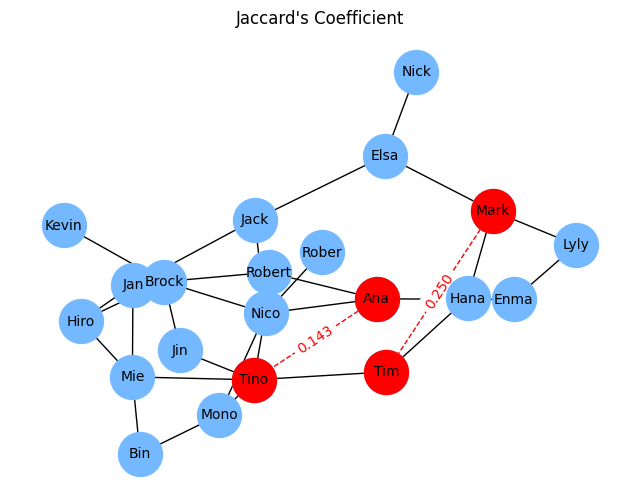


Adamic-Adar index:
(Ana, Tino) -> 0.558111
(Mark, Tim) -> 1.442695


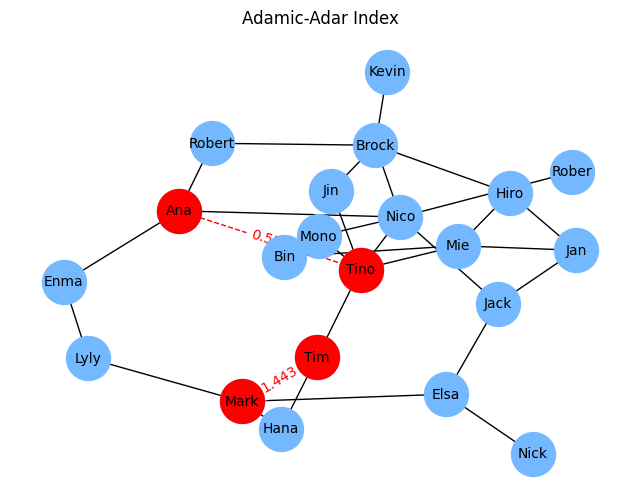


Preferential Attachment score:
(Ana, Tino) -> 15
(Mark, Tim) -> 6


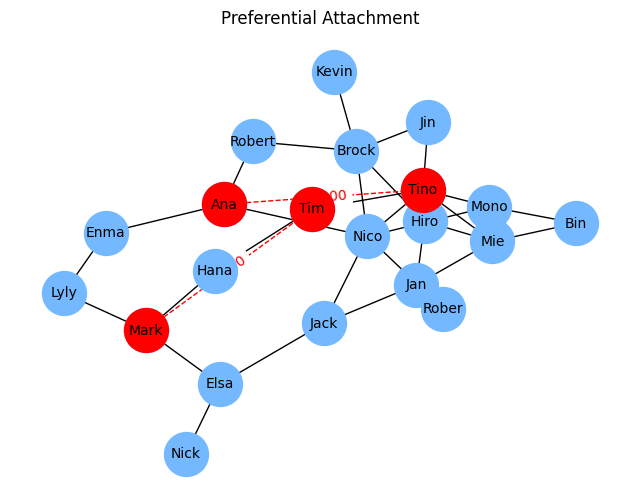


SimRank similarity:
(Ana, Tino) -> 0.302484
(Mark, Tim) -> 0.395129


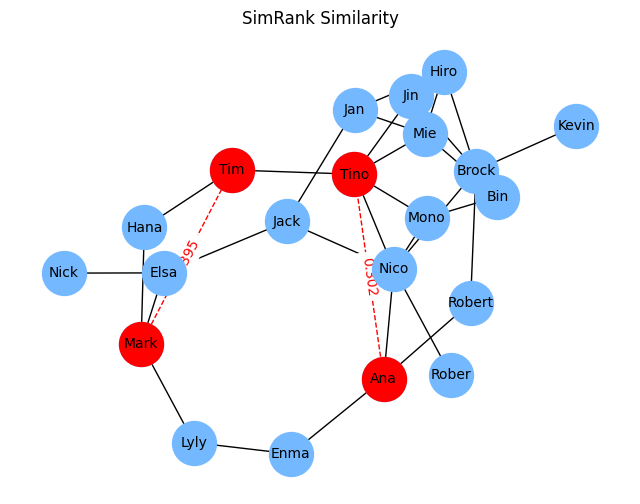

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
# Read graph data from edgelist
G = nx.read_edgelist("data/friend_network.txt")

# Draw graph with coefficient edges
def draw_coefficient_edges(G, preds, title):
    edge_labels = {}
    target_list = []

    for u, v, p in preds:
        edge_labels[(u, v)] = f"{p:.3f}"
        target_list.append(u)
        target_list.append(v)
        
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    nx.draw(G, pos, 
            node_size=1000,
            node_color='#74b9ff',
            with_labels=True,
            font_size=10)
    # Mark target nodes as green color
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=target_list,
                           node_size=1000,
                           node_color='r')
    nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red'
    )
    plt.show()

# Define the node pairs to analyze
node_list = [("Ana", "Tino"), ("Mark", "Tim")]

# Calculate and print Jaccard's coefficient
print("Jaccard's coefficient:")
jaccard_preds = list(nx.jaccard_coefficient(G, node_list))
for u, v, p in jaccard_preds:
    print(f"({u}, {v}) -> {p:.6f}")
draw_coefficient_edges(G, jaccard_preds, "Jaccard's Coefficient")

# Calculate and print Adamic-Adar
print("\nAdamic-Adar index:")
adamic_adar_preds = list(nx.adamic_adar_index(G, node_list))
for u, v, p in adamic_adar_preds:
    print(f"({u}, {v}) -> {p:.6f}")
draw_coefficient_edges(G, adamic_adar_preds, "Adamic-Adar Index")

# Calculate and print Preferential Attachment
print("\nPreferential Attachment score:")
pa_preds = list(nx.preferential_attachment(G, node_list))
for u, v, p in pa_preds:
    print(f"({u}, {v}) -> {p}")
draw_coefficient_edges(G, pa_preds, "Preferential Attachment")

# Calculate and print SimRank similarity
print("\nSimRank similarity:")
simrank_preds = list((u, v, nx.simrank_similarity(G, u, v)) for u, v in node_list)
for u, v, p in simrank_preds:
    print(f"({u}, {v}) -> {p:.6f}")
draw_coefficient_edges(G, simrank_preds, "SimRank Similarity")

# 2. Assignment on large-scale network:
## 2.1 Load and Draw
+ Load SC-TS graph from the file: [data/SC-TS.txt](https://https://github.com/NSLab-CUK/Graph-Mining-Spring-2025/tree/main/W6/data/SC-TS.txt) in the class github.
+ Read pair of nodes in the file: [data/node_pairs.txt](https://https://github.com/NSLab-CUK/Graph-Mining-Spring-2025/tree/main/W6/data/node_pairs.txt)
+ Calculate common neighbors (CN), Jaccard (JC), Adamic-Adar (AA), Preferential attachment (PA) and SimRank similarity of these above pair of nodes.
+ Draw graph and the link among above node pairs.

#### Notes: in the node pairs file, 2 columns correspond to 2 nodes in a pair, and the number of rows is the number of pairs.

## 2.2 Additional questions 
+ What are the top 5 pairs of nodes with the highest Jaccard (JC) similarity?
+ What are the top 5 pairs of nodes with the highest Adamic-Adar (AA) index?
+ What are the top 5 pairs of nodes with the highest Preferential Attachment (PA) score?





SimRank similarity: 
(F17E9.12, F45E1.6) -> 0.11804462
(C50F4.5, T23D8.5) -> 0.11804340
(B0035.8, B0035.10) -> 0.11805700


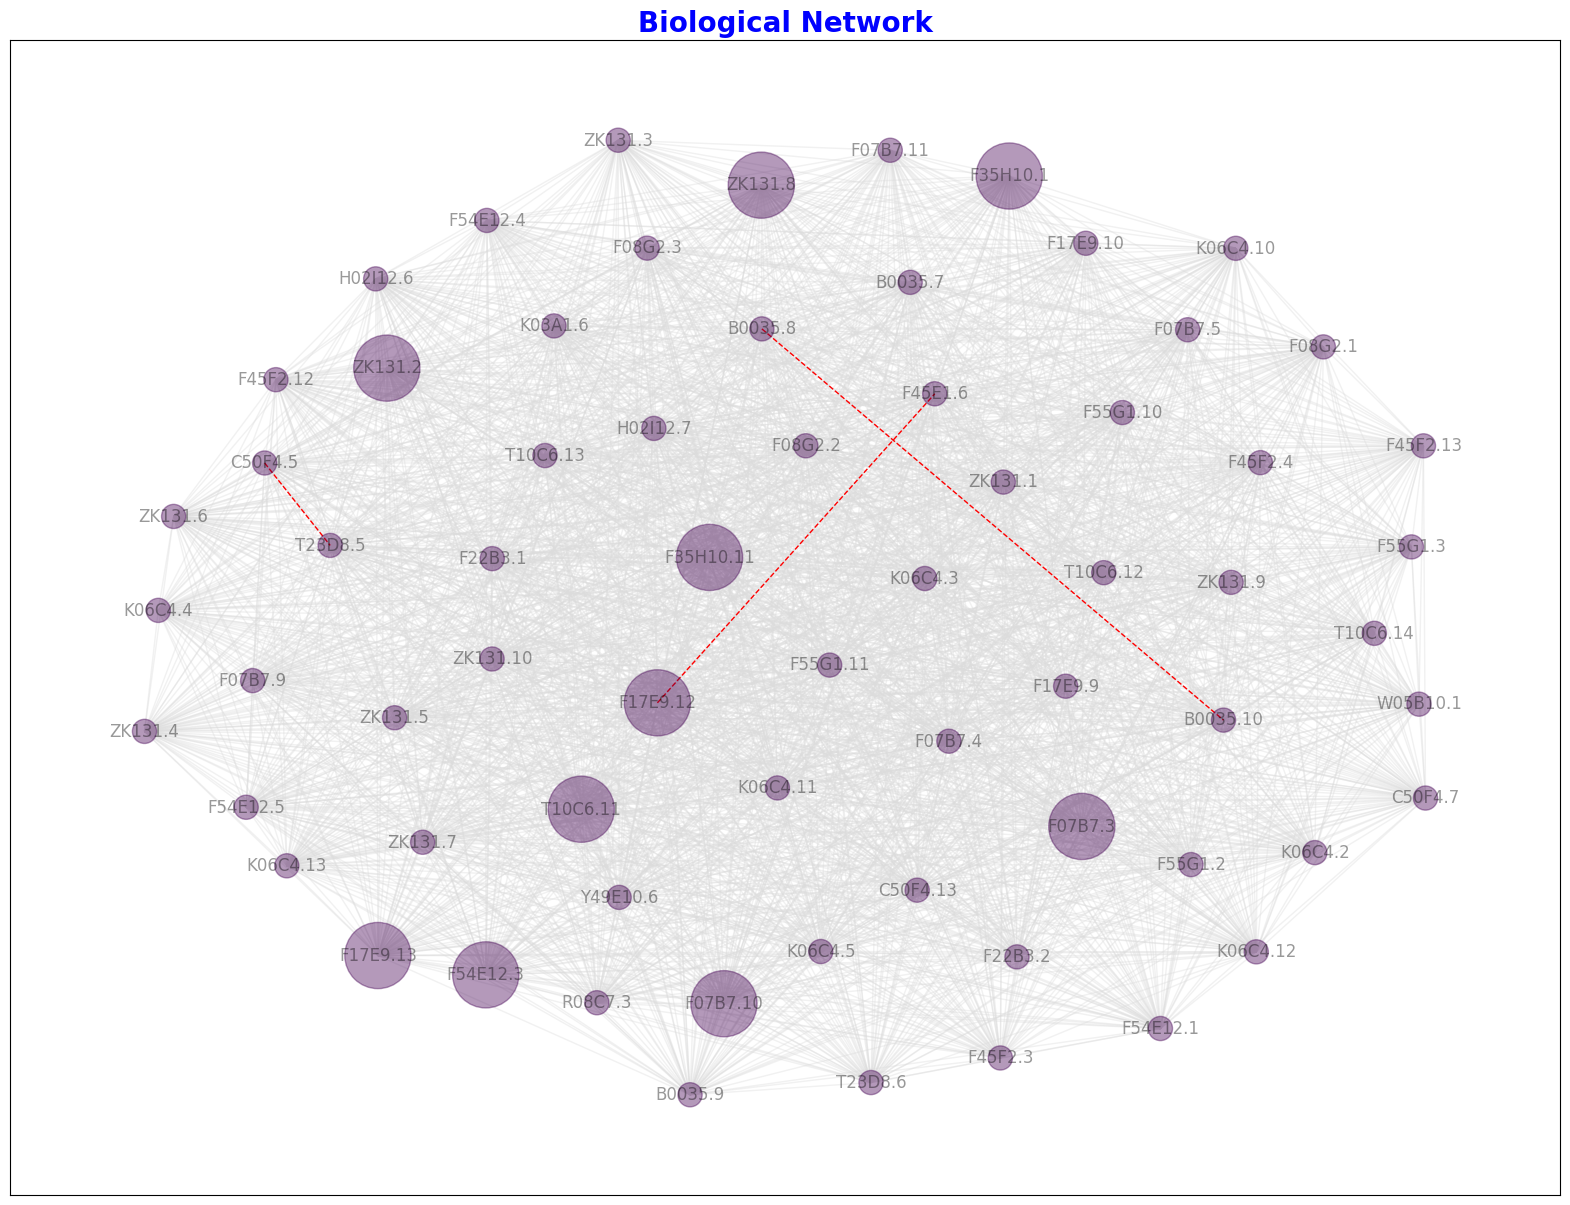

In [5]:
import matplotlib.pyplot as plt

# Function to calculate SimRank similarity of a list of node pairs
def calculate_simrank_similarity(G, node_list):
    return ((source, target, nx.simrank_similarity(G, source, target)) for source, target in node_list)

# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, pos):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=True,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
        
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Biological Network", font)
    
# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/SC-TS.txt")

# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, pos)

node_list =  [('F17E9.12', 'F45E1.6'), ('C50F4.5', 'T23D8.5'), ('B0035.8', 'B0035.10')]

preds = calculate_simrank_similarity(G, node_list)

print("SimRank similarity: ")
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")
    
target_list = []

for u, v, p in preds:
    target_list.append(u)
    target_list.append(v)

# Mark edges
nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

## 2.2 Additional questions 
+ What are the top 5 pairs of nodes with the highest Jaccard (JC) similarity?
+ What are the top 5 pairs of nodes with the highest Adamic-Adar (AA) index?
+ What are the top 5 pairs of nodes with the highest Preferential Attachment (PA) score?

Total number of nodes: 636
Total number of possible pairs: 201930
Sampling 10000 pairs for analysis
Calculating Jaccard coefficients...


  0%|          | 0/10000 [00:00<?, ?it/s]

Calculating Adamic-Adar indices...


  0%|          | 0/10000 [00:00<?, ?it/s]

Calculating Preferential Attachment scores...


  0%|          | 0/10000 [00:00<?, ?it/s]


Top 5 pairs with highest Jaccard similarity:
(K04A8.5, ZK6.7) -> 1.000000
(F25D1.5, R05D8.9) -> 1.000000
(F58G4.1, R06C7.10) -> 1.000000
(Y47G6A.21, Y47G6A.22) -> 1.000000
(R11G11.14, Y50E8A.7) -> 1.000000

Top 5 pairs with highest Adamic-Adar index:
(C56G2.6, F11A5.12) -> 15.881329
(F07B7.10, F55G1.11) -> 15.514405
(C50F4.13, ZK131.10) -> 15.514405
(F22B3.1, K06C4.12) -> 15.514405
(F17E9.12, H02I12.6) -> 15.514405

Top 5 pairs with highest Preferential Attachment score:
(F07B7.10, F55G1.11) -> 4356
(C50F4.13, ZK131.10) -> 4356
(F22B3.1, K06C4.12) -> 4356
(F17E9.12, H02I12.6) -> 4356
(F45F2.12, T10C6.12) -> 4356


KeyError: 'K04A8.5'

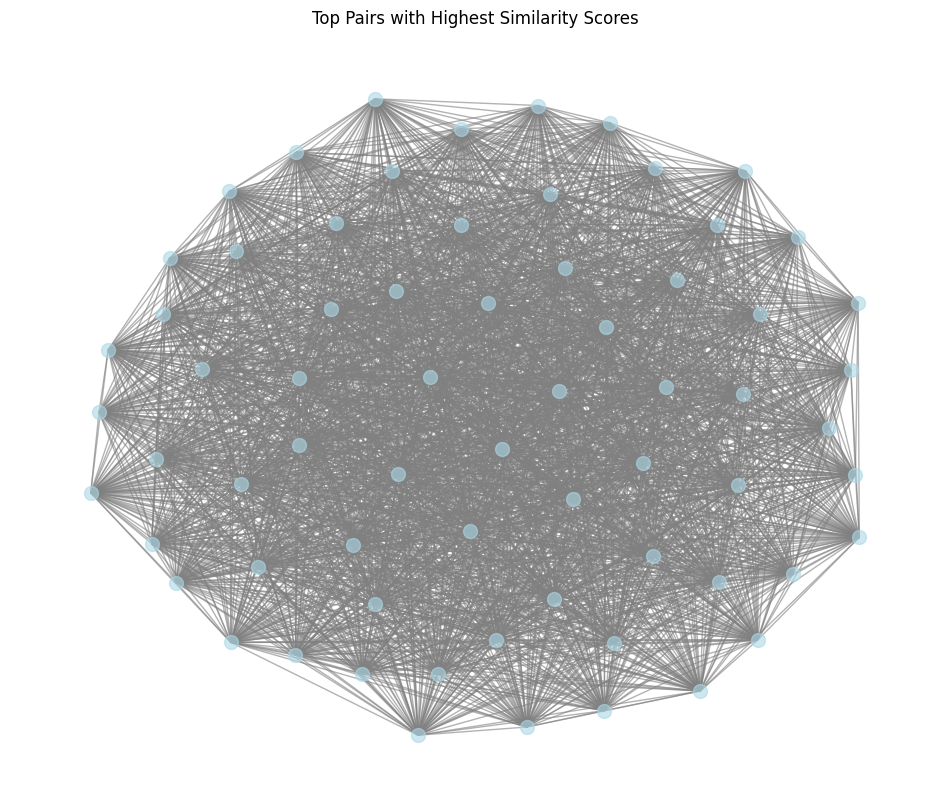

In [7]:
import itertools
from tqdm.notebook import tqdm
import random
from math import log  # Add import for log function

# Calculate metrics for all pairs of nodes in the graph

# Get all possible node pairs (excluding self-loops)
all_nodes = list(G.nodes())
all_pairs = list(itertools.combinations(all_nodes, 2))

print(f"Total number of nodes: {len(all_nodes)}")
print(f"Total number of possible pairs: {len(all_pairs)}")

# For large graphs, we need to limit the number of pairs to analyze
# Let's use a sample of pairs if the total is too large
if len(all_pairs) > 10000:
    random.seed(42)
    sample_pairs = random.sample(all_pairs, 10000)
    print(f"Sampling {len(sample_pairs)} pairs for analysis")
else:
    sample_pairs = all_pairs

# Calculate Jaccard coefficient
jaccard_results = []
print("Calculating Jaccard coefficients...")
for u, v in tqdm(sample_pairs):
    # Calculate Jaccard using common neighbors / union of neighbors
    u_neighbors = set(G.neighbors(u))
    v_neighbors = set(G.neighbors(v))
    common_neighbors = len(u_neighbors.intersection(v_neighbors))
    union_neighbors = len(u_neighbors.union(v_neighbors))
    if union_neighbors > 0:
        jaccard = common_neighbors / union_neighbors
        jaccard_results.append((u, v, jaccard))

# Calculate Adamic-Adar index
adamic_adar_results = []
print("Calculating Adamic-Adar indices...")
for u, v in tqdm(sample_pairs):
    # Calculate Adamic-Adar manually
    u_neighbors = set(G.neighbors(u))
    v_neighbors = set(G.neighbors(v))
    common_neighbors = u_neighbors.intersection(v_neighbors)
    aa_score = 0
    for w in common_neighbors:
        w_degree = len(list(G.neighbors(w)))
        if w_degree > 1:  # Avoid division by zero or log(1)=0
            aa_score += 1.0 / log(w_degree)
    adamic_adar_results.append((u, v, aa_score))

# Calculate Preferential Attachment
pa_results = []
print("Calculating Preferential Attachment scores...")
for u, v in tqdm(sample_pairs):
    # Calculate PA as product of degrees
    pa_score = len(list(G.neighbors(u))) * len(list(G.neighbors(v)))
    pa_results.append((u, v, pa_score))

# Sort results and get top 5
top_jaccard = sorted(jaccard_results, key=lambda x: x[2], reverse=True)[:5]
top_adamic_adar = sorted(adamic_adar_results, key=lambda x: x[2], reverse=True)[:5]
top_pa = sorted(pa_results, key=lambda x: x[2], reverse=True)[:5]

# Print results
print("\nTop 5 pairs with highest Jaccard similarity:")
for u, v, score in top_jaccard:
    print(f"({u}, {v}) -> {score:.6f}")

print("\nTop 5 pairs with highest Adamic-Adar index:")
for u, v, score in top_adamic_adar:
    print(f"({u}, {v}) -> {score:.6f}")

print("\nTop 5 pairs with highest Preferential Attachment score:")
for u, v, score in top_pa:
    print(f"({u}, {v}) -> {score}")

# Visualize the top pairs on the graph
plt.figure(figsize=(12, 10))
plt.title("Top Pairs with Highest Similarity Scores")

# Create edge lists for visualization
top_jaccard_edges = [(u, v) for u, v, _ in top_jaccard]
top_aa_edges = [(u, v) for u, v, _ in top_adamic_adar]
top_pa_edges = [(u, v) for u, v, _ in top_pa]

# Draw the graph with top pairs highlighted
nx.draw(largest_component, pos, node_size=100, node_color='lightblue', edge_color='gray', alpha=0.6)

# Highlight top Jaccard edges in red
nx.draw_networkx_edges(largest_component, pos, edgelist=top_jaccard_edges, edge_color='red', width=2)

# Highlight top Adamic-Adar edges in green
nx.draw_networkx_edges(largest_component, pos, edgelist=top_aa_edges, edge_color='green', width=2)

# Highlight top PA edges in blue
nx.draw_networkx_edges(largest_component, pos, edgelist=top_pa_edges, edge_color='blue', width=2)

# Add legend
plt.legend(['Graph', 'Top Jaccard', 'Top Adamic-Adar', 'Top PA'])
plt.show()